In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *

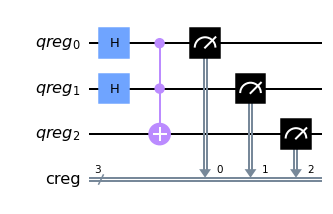

In [4]:
#define the number of qubits - width
width = 3

#define the number of qubits - depth
depth = 5  

# define a quantum register with two qubits
q =  QuantumRegister(width,"qreg")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c = ClassicalRegister(width,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

qc.h(0)
qc.h(1)
qc.ccx(0,1,2)

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw(output='mpl') # re-run the cell if the figure is not displayed

In [5]:
x = qc.depth()
print(x)

3


{'000': 2558, '001': 2485, '111': 2458, '010': 2499}



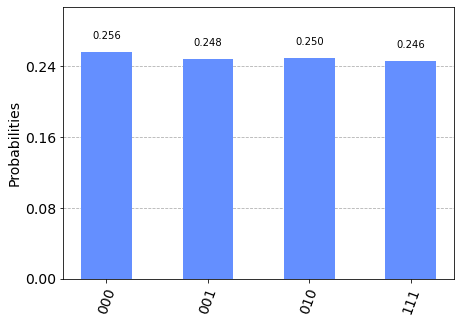

In [10]:
# execute the circuit 10000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [6]:
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

provider = IBMQ.get_provider("ibm-q")
#using this tool to monitor our position in queue
from qiskit.tools.monitor import job_monitor

#choose real device
backend = provider.get_backend('ibmq_lima')

In [7]:
qc_transpiled = transpile(qc, backend)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 21


In [8]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

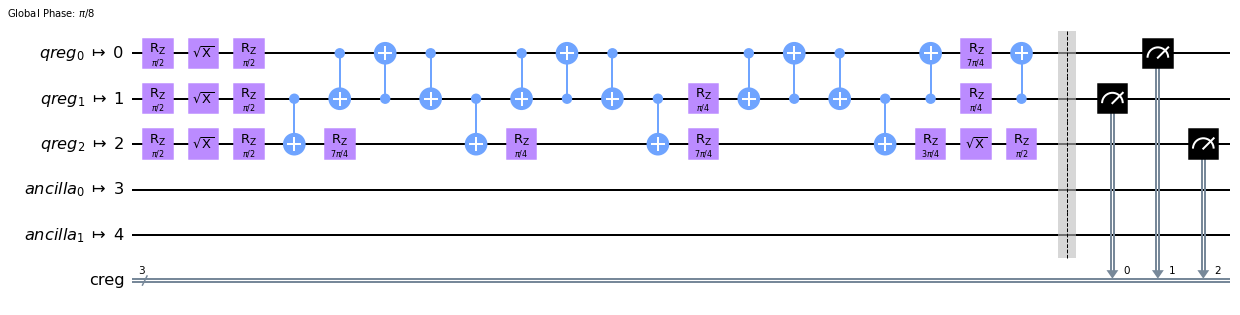

In [9]:
qc_transpiled.draw(output='mpl')

In [11]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


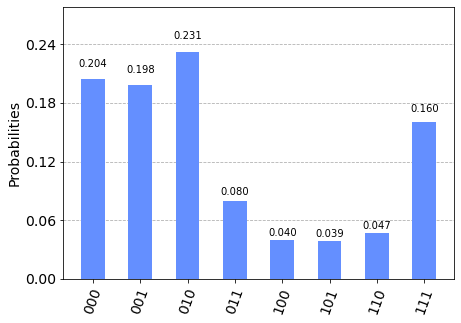

In [12]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)